In [ ]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

In [ ]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

# Lecture 29 Correlation

## Approach to Prediction

Predication is based on data. </br>
Using an existing sample we can make predictions of an overall situation by evaluating the average of all those that meet the same criteria. 

One way to predict an outcome for an individual is to find others who are like that individual and whose outcomes you know.</br>
Use those outcomes as the basis of your prediction.

In [ ]:
# Note: Child heights are the **adult** heights of children in a family
families = Table.read_table('family_heights.csv')
families

In [ ]:
#Takes the average of the height of the mother and father. 

parent_avgs = (families.column('father') + families.column('mother'))/2

In [ ]:
#Create a table with two columns: Parent Average and Child which holds the individual child's height. 
heights = 


heights

In [ ]:
#Plot a scatter comparing Parent Average with Child height.

heights.scatter('Parent Average', 'Child')

***How would you describe this scatterplot?***

In [ ]:
#Focus on the grouping of child heights between the parent averages of 67.5 and 68.5.

heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [ ]:
#Calculate the average of all the children in the focused grouping. 

nearby = heights.where('Parent Average', are.between(67.5, 68.5))
nearby_mean = np.average(nearby.column('Child'))
nearby_mean

In [ ]:
#Plot the new average. 
#This is the predicted average height for a child with parent's in this height range.

heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, nearby_mean, color='red', s=50);

In [ ]:
def predict_child(h):
    """Predict the height of a child whose parents have a parent average height of p_avg.
    
    The prediction is the average height of the children whose parent average height is
    in the range p_avg plus or minus 0.5.
    """
    nearby = 
    return 

In [ ]:
#Find all the predicted heights of children with parent's with different average heights. 

heights_with_predictions = heights.with_columns(
    'Prediction', heights.apply(predict_child, 'Parent Average'))

In [ ]:
#Plot all the new predictions

heights_with_predictions.scatter('Parent Average')

## Association

Establishing a relationship between variables. 
Look for a pattern in the graph: Linear or Non-Linear.

Load the data about hybrid data. <br>
Describe the table.


In [ ]:
#Load in data about hybrid vehicles. 

hybrid = Table.read_table('hybrid.csv')
hybrid

In [ ]:
#Sort the table by MSRP from greatest to least. Do not reassign.
hybrid.sort('msrp', descending=True)


In [ ]:
#Compare the hybrid mpg with the msrp on a scatter plot. 



In [ ]:
#Compare the hybrid accerleration with the msrp on a scatter plot. 



In [ ]:
#Create a table with just hybrids that are SUV. 
suv = 
suv

In [ ]:
#Determine how many hybrids are in that table. 



In [ ]:
#Compare the hybrid SUVs accerleration with the msrp on a scatter plot. 



In [ ]:
#Compare the hybrid SUVs mpg with the msrp on a scatter plot. 



In [ ]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return 

In [ ]:
#View the data using standard units. 

Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

#What do you notice?

In [ ]:
#Compare the hybrid SUVs accerleration with the msrp on a scatter plot. 



In [ ]:
#View the data in standard units. 

Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

#What do you notice?

## Correlation
An association that is linear is referred to as correlation. 
A correlation coefficient, r, can measure the strength and direction of a linear relationship. </br>
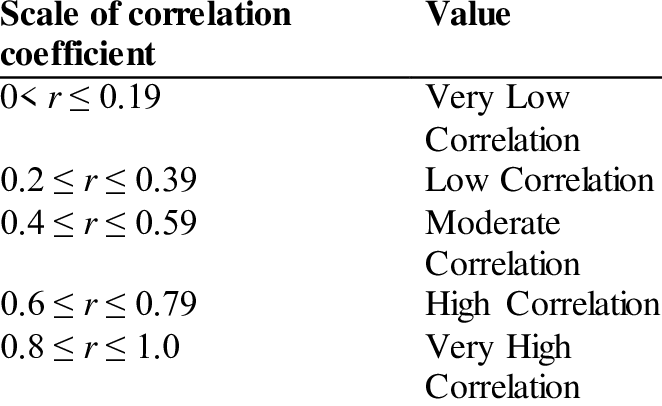

In [ ]:
r_scatter(-0.2)

In [ ]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y 
    )
t

In [ ]:
t.scatter('x', 'y', s=30, color='red')

In [ ]:
t = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y) 
    )
t

In [ ]:
t.scatter(2, 3, s=30, color='red')

In [ ]:
t = t.with_columns(
    'product of standard units', t.column(2) * t.column(3))
t

In [ ]:
# r is the average of the products of the standard units
r = np.average(t.column(2) * t.column(3))
r

In [ ]:
r = np.average(t.column(4))
r

In [ ]:
def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

In [ ]:
correlation(t, 'x', 'y')

In [ ]:
suv.scatter('mpg', 'msrp')

In [ ]:
correlation(suv, 'mpg', 'msrp')

In [ ]:
suv.scatter('acceleration', 'msrp')

In [ ]:
correlation(suv, 'acceleration', 'msrp')

### Switching Axes

In [ ]:
correlation(t, 'x', 'y')

In [ ]:
t.scatter('x', 'y', s=30, color='red')

In [ ]:
t.scatter('y', 'x', s=30, color='red')

In [ ]:
correlation(t, 'y', 'x')

In [ ]:
suv.scatter('msrp', 'mpg')

In [ ]:
correlation(suv, 'msrp', 'mpg')

In [ ]:
suv.scatter( 'msrp', 'acceleration')

In [ ]:
correlation(suv, 'msrp', 'acceleration')